### NE 155 Final Project- 2D Diffusion Solver
#### Laura Shi

### Two Dimensional Diffusion Equation (Generally)
$$\frac{\partial U}{\partial t} = D(\frac{\partial ^2 U }{\partial x^2} + \frac{\partial ^2 U }{\partial y^2})$$
where $D$ is the diffusion constant and have function $U(x, y, t)$

### Diffusion Equation for Nuclear Applications

#### Boundary Conditions: 
* Vacuum boundaries on the bottom and left faces
* Reflecting boundaries on the top and right faces

Non-reentrant condition where $\vec{r}_s$ is on the outside boundary and $\hat{e}_s$ is the outward normal:
$$\psi(\vec{r}_s, \Omega, t) = 0 \text{ for } \Omega \cdot \hat{e}_s < 0$$
Thus our boundary conditions at the vacuum will deal with the partial currents such that 

$$J_{-}(\vec{r}_s, t) = J_{-}(x_s, t) = \frac{1}{4} \phi(x_s, t) + \frac{D}{2}\frac{d \phi}{dx}\Bigm\lvert_{x_s} = 0 $$

$$\text{Or } \frac{1}{\phi(x_s, t)}\frac{d \phi}{dx}\Bigm\lvert_{x_s} = -\frac{1}{2D}$$

For a one-dimensional slab at $x = x_s$ where the extrapolated boundary distance $\tilde{x}_s $ is:

$$\tilde{x}_s = x_s + 2D = x_s + \frac{2}{3}\lambda_{tr}\$$

Where $\phi(\tilde{x_s}) = 0$ as a replacement for the vacuum condition $J_{-}(x_s, t)$.

The reflective boundary condition can be given by assuming mirror symmetry at the surface such that:

$$\psi(\hat{\Omega}_{IN}) = \psi(\hat{\Omega}_{OUT})$$

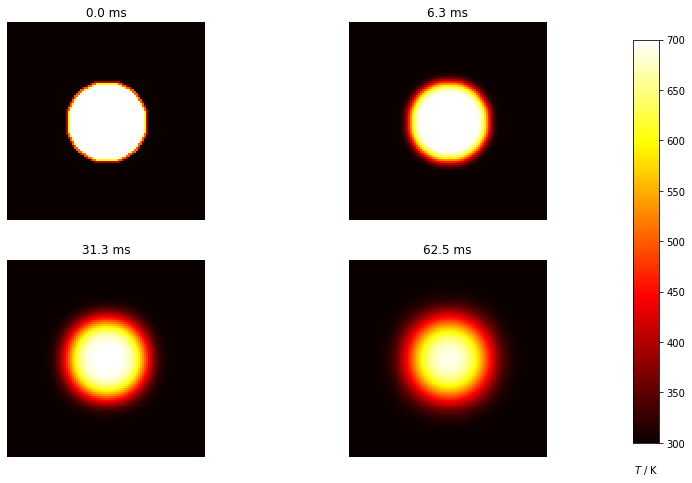

In [5]:
#example with time information taken from:
#https://scipython.com/book/chapter-7-matplotlib/examples/the-two-dimensional-diffusion-equation/

import numpy as np
import matplotlib.pyplot as plt

# plate size, mm
w = h = 10.
# intervals in x-, y- directions, mm
dx = dy = 0.1
# Thermal diffusivity of steel, mm2.s-1
D = 4.

Tcool, Thot = 300, 700

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = u0.copy()

# Initial conditions - circle of radius r centred at (cx,cy) (mm)
r, cx, cy = 2, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = Thot

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 101
# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure(figsize = (12, 8))
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        #print(m, fignum) #m is number of steps in time set by mfig and fignum is iteration
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('hot'), vmin=Tcool,vmax=Thot)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(m*dt*1000))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()